Iteration 1, Cost: 3600.0
Iteration 1, Cost: 3100.66330896
Iteration 1, Cost: 2467.98580122481
Iteration 1, Cost: 2238.038195403241
Iteration 1, Cost: 2772.554209718744
Iteration 1, Cost: 2394.977112910375
Gradient Descent Coefficients: [0.99392762] [0.01564419]
Sklearn Coefficients: -13.249581239530976 1.2060301507537687
MSE: 6.888986413259218
RMSE: 2.6246878696826443


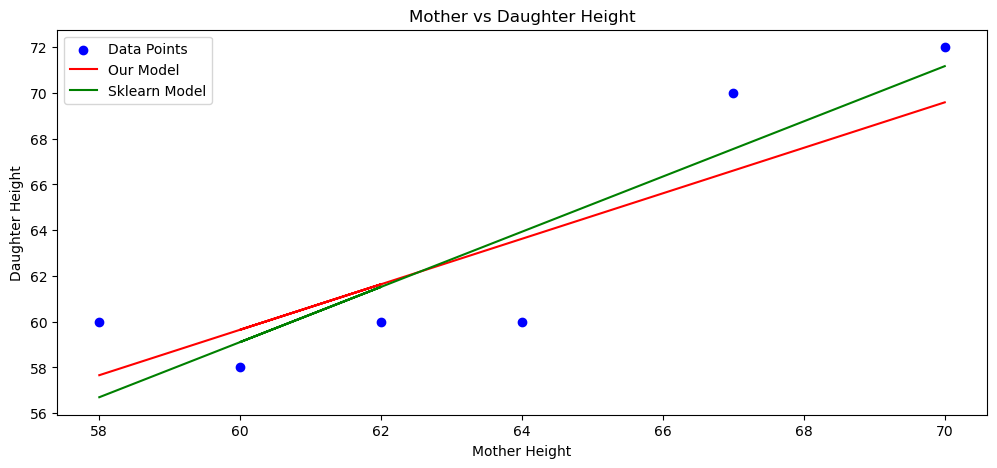

Predicted daughter's height for mother height 63: 62.73031825795645


In [57]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('height.csv')
x = data['mother_height'].values.reshape(-1, 1)
y_true = data['daughter_height'].values
def linear_regression(x, w, b):
    return w * x + b
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
def gradient_descent_update(w, b, x, y_true, y_pred, alpha):
    dw = -2 * (x * (y_true - y_pred))
    db = -2 * (y_true - y_pred)
    w_new = w - (alpha * dw)
    b_new = b - (alpha * db)
    return w_new, b_new

w = 0
b = 0
alpha = 0.00001
epochs = 10  # Increased iterations for better convergence

for i in range(epochs):
    for x1,gt1 in zip(x, y_true):
        y1 = linear_regression(x1, w, b)
        cost = mse(gt1, y1)
        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i+1}, Cost: {cost}")
        w, b = gradient_descent_update(w, b, x1, gt1, y1, alpha)


sklearn_model = LinearRegression()
sklearn_model.fit(x, y_true)
print("Gradient Descent Coefficients:", w,b)
print("Sklearn Coefficients:", sklearn_model.intercept_, sklearn_model.coef_[0])

y_pred = linear_regression(x, w, b)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

plt.figure(figsize=(12, 5))
plt.scatter(x, y_true, color='blue', label='Data Points')
plt.plot(x, linear_regression(x, w, b), color='red', label='Our Model')
plt.plot(x, sklearn_model.predict(x), color='green', label='Sklearn Model')
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Mother vs Daughter Height')
plt.legend()
plt.show()

new_mother_height = 63
predicted_height = sklearn_model.predict([[new_mother_height]])
print(f"Predicted daughter's height for mother height 63: {predicted_height[0]}")

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('pass.csv')


X = data['hours_study'].values.reshape(-1, 1)
y = data['pass'].values
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

custom_model = CustomLogisticRegression(learning_rate=0.1, num_iterations=500)
custom_model.fit(X, y)
custom_predictions = custom_model.predict(X)
custom_accuracy = accuracy_score(y, custom_predictions)
print(f"Custom Logistic Regression Accuracy: {custom_accuracy:.4f}")
sklearn_model = LogisticRegression()
sklearn_model.fit(X, y)
sklearn_predictions = sklearn_model.predict(X)
sklearn_accuracy = accuracy_score(y, sklearn_predictions)
print(f"Scikit-learn Logistic Regression Accuracy: {sklearn_accuracy:.4f}")

Custom Logistic Regression Accuracy: 1.0000
Scikit-learn Logistic Regression Accuracy: 1.0000
